# Import libraries

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Load and Check data

In [287]:
train_df=pd.read_csv("C:\\Users\\natiq\\Desktop\\Titanic - Machine Learning from Disaster\\train.csv")
test_df=pd.read_csv("C:\\Users\\natiq\\Desktop\\Titanic - Machine Learning from Disaster\\test.csv")

In [288]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
train_df.shape

(891, 12)

In [290]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
test_PassengerId=test_df['PassengerId']

In [292]:
test_df.shape

(418, 11)

In [293]:
test_PassingerID=test_df['PassengerId']

In [294]:
print(f'Number of training examples: {train_df.shape[0]}')
print(f'Number of test examples: {test_df.shape[0]}')

Number of training examples: 891
Number of test examples: 418


In [295]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [296]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


combining training & testing data for preposesing after that we do not write same code for test

In [297]:
df=pd.concat([train_df, test_df], axis=0)

In [298]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [300]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [301]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [302]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


# Missing Values

In [303]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

<AxesSubplot:>

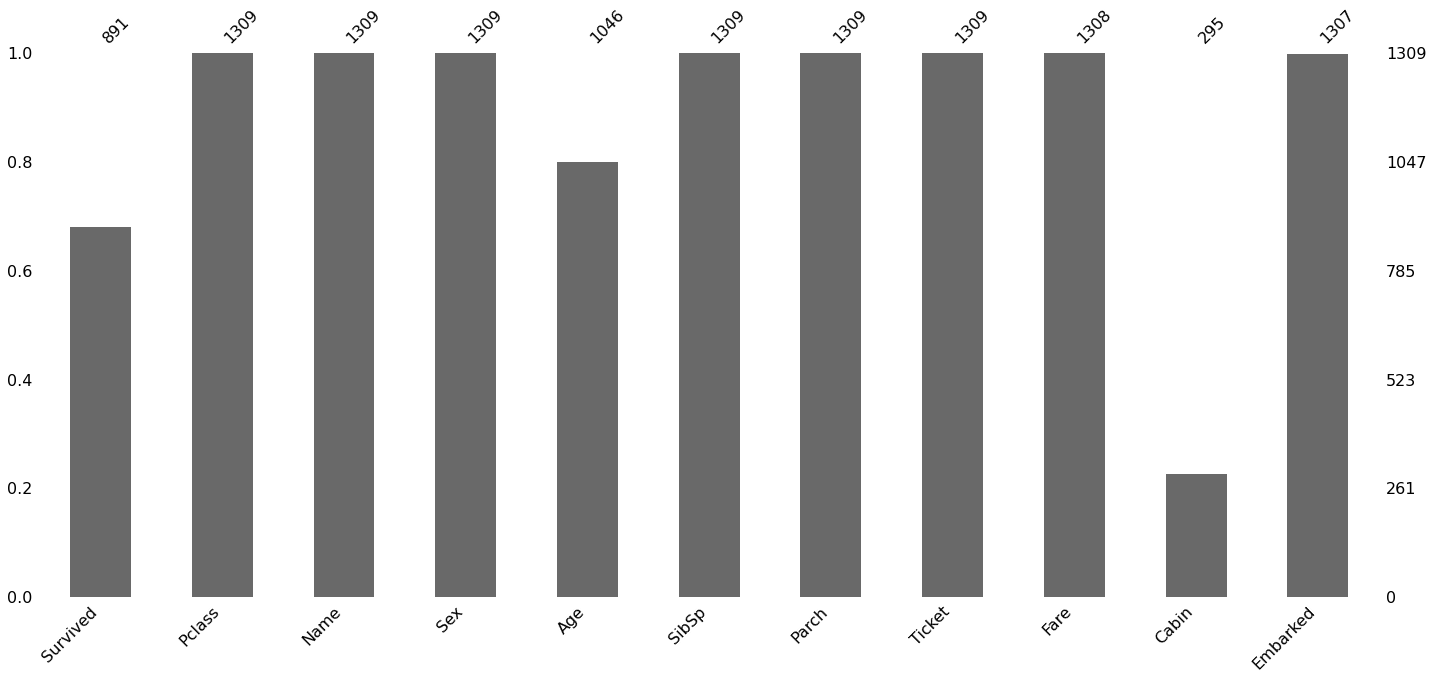

In [304]:
msn.bar(df)

##### Fare

In [305]:
df[df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [306]:
print(df['Fare'].mean())
print(df['Fare'].median())

33.2954792813456
14.4542


In [307]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

##### Cabin

In [308]:
df[df['Cabin'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [309]:
print( df['Cabin'].isnull().sum()/df.shape[0] )

0.774637127578304


In [310]:
#df['Cabin']=df.Cabin.fillna("unknow")
#df['Cabin']=df.Cabin.apply(lambda x : len(x))
df.drop('Cabin', axis=1, inplace=True)

##### Embarked

In [311]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [312]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [313]:
df[ (df['Sex']=='female') & (df['SibSp']==0) &(df['Parch']==0) & (df['Pclass']==1) ]['Embarked'].value_counts()

C    30
S    20
Name: Embarked, dtype: int64

In [314]:
df['Embarked'].mode()

0    S
dtype: object

In [315]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

##### Age

In [316]:
df['Age'].describe().T

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

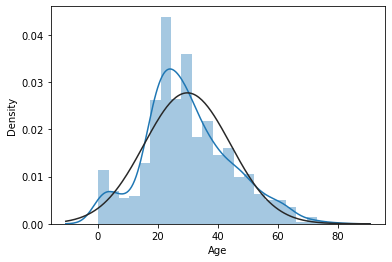

In [317]:
sns.distplot(df['Age'], fit=stats.norm)

In [318]:
df['Age'].median()

28.0

In [319]:
df['Age']=df['Age'].fillna(df.groupby(['Sex'])['Age'].transform('median'))

### Check null data

In [320]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

## Correlation

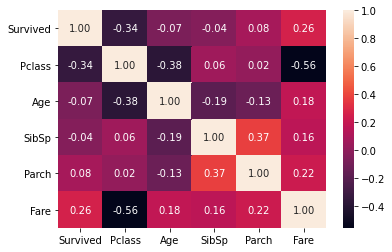

In [321]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

# Feature Engineering

In [322]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0.5, 1.0, 'Age distribution of male and female')

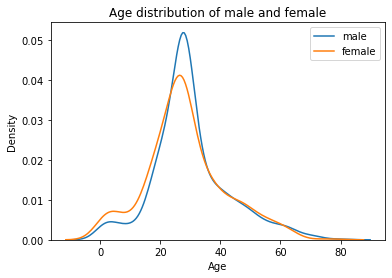

In [323]:
sns.kdeplot(df[df['Sex']=='male']['Age'], label = 'male')
sns.kdeplot(df[df['Sex']=='female']['Age'],label = 'female')
plt.legend()
plt.title('Age distribution of male and female')

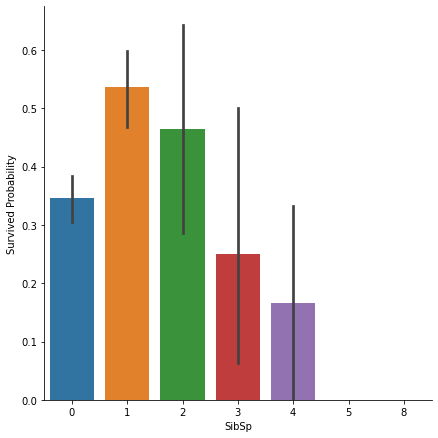

In [324]:
sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size = 6)
plt.ylabel("Survived Probability")
plt.show()

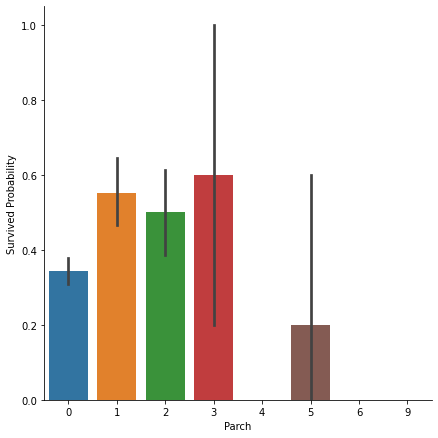

In [325]:
sns.factorplot(x = "Parch", y = "Survived", kind = "bar", data = df, size = 6)
plt.ylabel("Survived Probability")
plt.show()

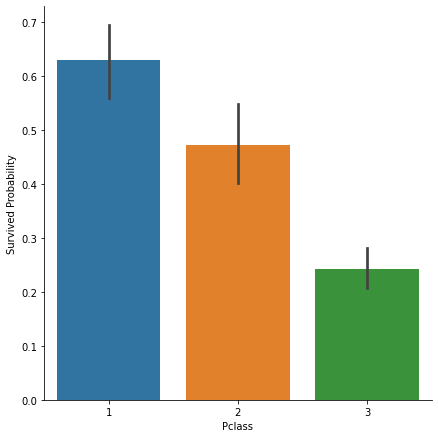

In [326]:
sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size = 6)
plt.ylabel("Survived Probability")
plt.show()

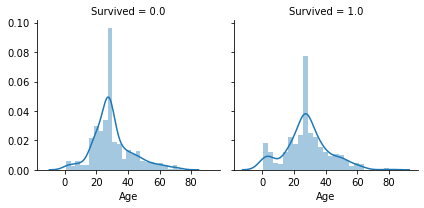

In [327]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

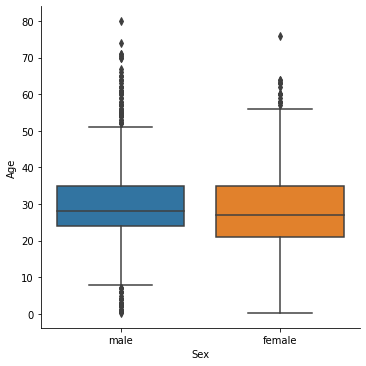

In [328]:
sns.factorplot(x = "Sex", y = "Age", data = df, kind = "box")
plt.show()

<AxesSubplot:xlabel='Parch', ylabel='count'>

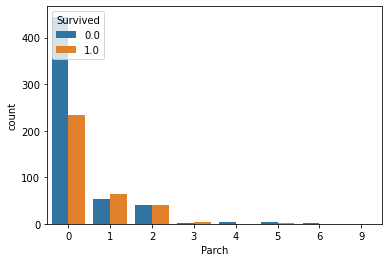

In [329]:
sns.countplot(x='Parch', data=df, order=df['Parch'].value_counts().index, hue='Survived')

##### Ticket

In [330]:
df['Ticket']=df.Ticket.apply(lambda x : len(x))

##### Family size

In [331]:
df['FamilySize']=df.SibSp+df.Parch+1

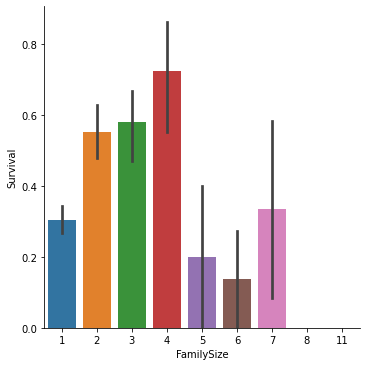

In [332]:
sns.factorplot(x = "FamilySize", y = "Survived", data =df, kind = "bar")
plt.ylabel("Survival")
plt.show()

In [333]:
family={1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

In [334]:
df['Family_Size_Grouped']=df['FamilySize'].map(family)

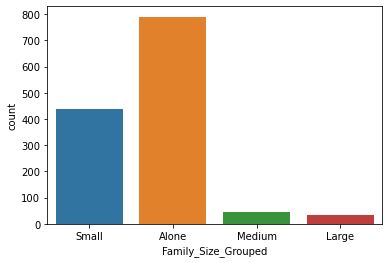

In [335]:
sns.countplot(x = "Family_Size_Grouped", data = df)
plt.show()

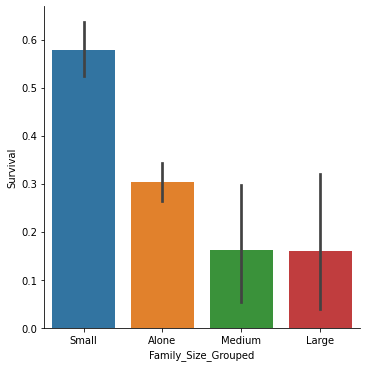

In [336]:
sns.factorplot(x = "Family_Size_Grouped", y = "Survived", data = df, kind = "bar")
plt.ylabel("Survival")
plt.show()

##### Title

In [337]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [338]:
df['Name'].apply( lambda x: x.split(', ')[1].split('.')[0] )

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 1309, dtype: object

In [339]:
#df.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
df['Title']=df['Name'].apply( lambda x: x.split(', ')[1].split('.')[0] )

In [340]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Jonkheer          1
the Countess      1
Dona              1
Mme               1
Don               1
Sir               1
Lady              1
Name: Title, dtype: int64

In [341]:
titles=['Mr', 'Miss', 'Mrs', 'Master']

In [342]:
df['Title']=df['Title'].apply(lambda x: x if x in titles else 'Other')

In [343]:
df['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

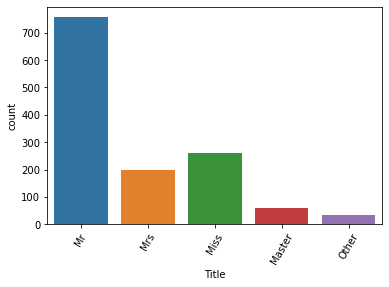

In [344]:
sns.countplot(x="Title", data = df)
plt.xticks(rotation = 60)
plt.show()

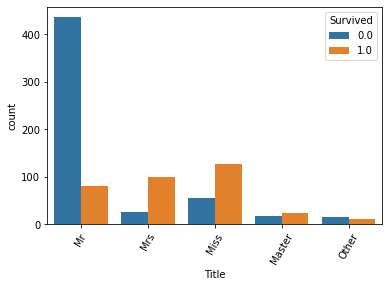

In [345]:
sns.countplot(x="Title", data = df, hue='Survived')
plt.xticks(rotation = 60)
plt.show()

##### Last name

In [346]:
df['Last_Name']=df.Name.apply(lambda x: x.split(',')[0].strip())

##### Married

In [347]:
df['IsMarried']=df['Title'].apply(lambda x: 1 if x=='Mrs' else 0)

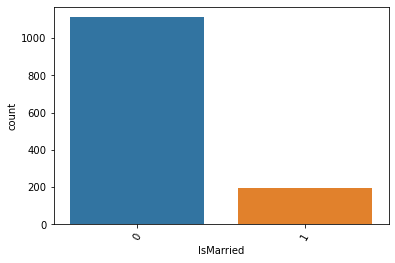

In [348]:
sns.countplot(x="IsMarried", data = df)
plt.xticks(rotation = 60)
plt.show()

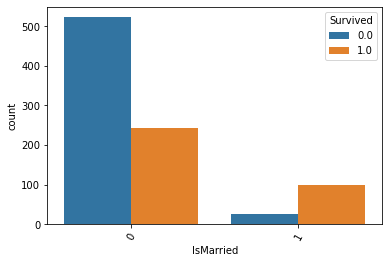

In [349]:
sns.countplot(x="IsMarried", data = df, hue='Survived')
plt.xticks(rotation = 60)
plt.show()

##### Alone

In [350]:
df['IsAlone']=df['FamilySize'].apply(lambda x: 1 if x==1 else 0)

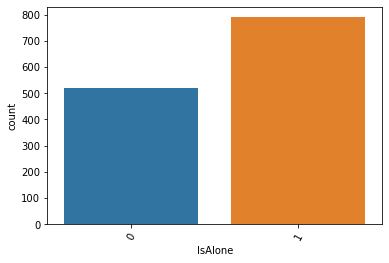

In [351]:
sns.countplot(x="IsAlone", data = df)
plt.xticks(rotation = 60)
plt.show()

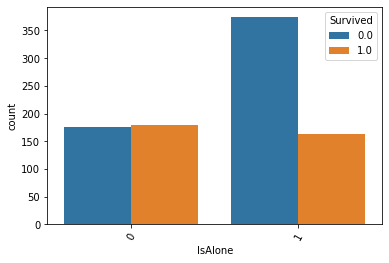

In [352]:
sns.countplot(x="IsAlone", data = df, hue='Survived')
plt.xticks(rotation = 60)
plt.show()

##### Woman or boy

Master is a title for an underage male. If a person is under 18, master would be used.
Once a person turns 18 and enters adulthood, mister would be used.

In [353]:
df['Woman_or_Boy'] = np.where( (df['Title']=='Master') | (df['Sex']=='female'), 1, 0 )

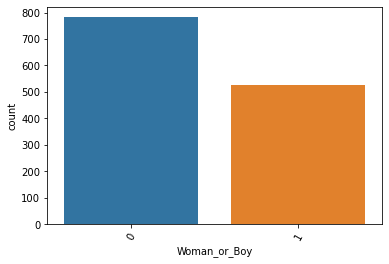

In [354]:
sns.countplot(x="Woman_or_Boy", data = df)
plt.xticks(rotation = 60)
plt.show()

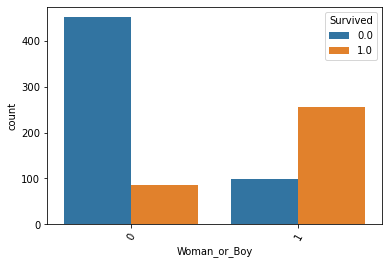

In [355]:
sns.countplot(x="Woman_or_Boy", data = df, hue='Survived')
plt.xticks(rotation = 60)
plt.show()

##### Fare bins

In [356]:
df['Fare'].describe().T

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<AxesSubplot:>

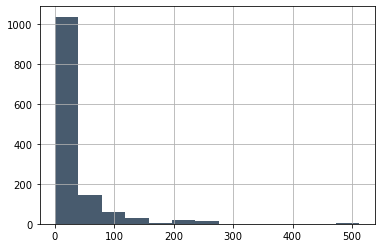

In [357]:
df["Fare"].hist(bins=13, color='#34495e', alpha=0.9)

In [358]:
df['FareBin'] = pd.qcut(df['Fare'], 13)

<AxesSubplot:xlabel='FareBin', ylabel='count'>

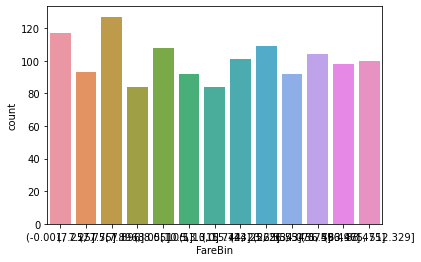

In [359]:
sns.countplot(x='FareBin', data=df)

<AxesSubplot:xlabel='FareBin', ylabel='count'>

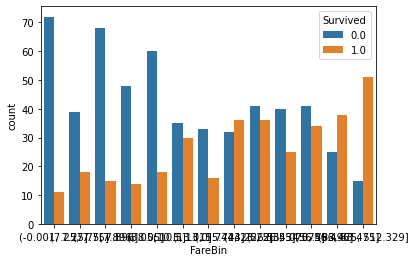

In [360]:
sns.countplot(x='FareBin', data=df, hue='Survived')

##### Age bins

<AxesSubplot:>

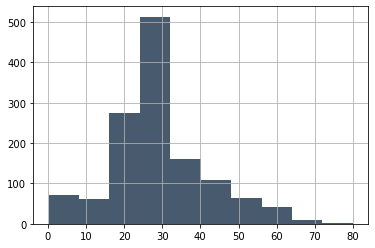

In [361]:
df["Age"].hist(bins=10, color='#34495e', alpha=0.9)

In [362]:
df['AgeBin'] = pd.cut(df['Age'].astype(int), 10)

<AxesSubplot:xlabel='AgeBin', ylabel='count'>

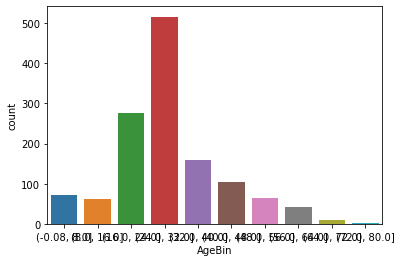

In [363]:
sns.countplot(x='AgeBin', data=df)

<AxesSubplot:xlabel='AgeBin', ylabel='count'>

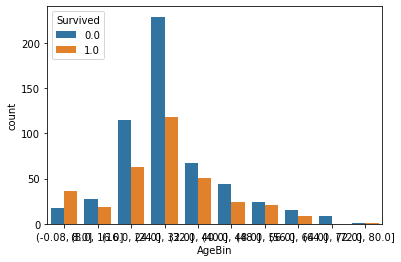

In [364]:
sns.countplot(x='AgeBin', data=df, hue='Survived')

In [365]:
df.drop(['Name',],axis=1,inplace=True)

### Check data

In [366]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Family_Size_Grouped,Title,Last_Name,IsMarried,IsAlone,Woman_or_Boy,FareBin,AgeBin
0,0.0,3,male,22.0,1,0,9,7.2500,S,2,Small,Mr,Braund,0,0,0,"(-0.001, 7.25]","(16.0, 24.0]"
1,1.0,1,female,38.0,1,0,8,71.2833,C,2,Small,Mrs,Cumings,1,0,1,"(56.496, 83.475]","(32.0, 40.0]"
2,1.0,3,female,26.0,0,0,16,7.9250,S,1,Alone,Miss,Heikkinen,0,1,1,"(7.896, 8.05]","(24.0, 32.0]"
3,1.0,1,female,35.0,1,0,6,53.1000,S,2,Small,Mrs,Futrelle,1,0,1,"(34.075, 56.496]","(32.0, 40.0]"
4,0.0,3,male,35.0,0,0,6,8.0500,S,1,Alone,Mr,Allen,0,1,0,"(7.896, 8.05]","(32.0, 40.0]"


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Survived             891 non-null    float64 
 1   Pclass               1309 non-null   int64   
 2   Sex                  1309 non-null   object  
 3   Age                  1309 non-null   float64 
 4   SibSp                1309 non-null   int64   
 5   Parch                1309 non-null   int64   
 6   Ticket               1309 non-null   int64   
 7   Fare                 1309 non-null   float64 
 8   Embarked             1309 non-null   object  
 9   FamilySize           1309 non-null   int64   
 10  Family_Size_Grouped  1309 non-null   object  
 11  Title                1309 non-null   object  
 12  Last_Name            1309 non-null   object  
 13  IsMarried            1309 non-null   int64   
 14  IsAlone              1309 non-null   int64   
 15  Woman_or_Boy         1

# EDA

## Univariate Variable Analysis

In [368]:
num_vars=list(df._get_numeric_data().columns)

print(f'Numeric variables: {num_vars}')

Numeric variables: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'IsMarried', 'IsAlone', 'Woman_or_Boy']


In [369]:
cat_vars=list(set(df.columns)-set(num_vars))

print(f'Categoric variable: {cat_vars}')

Categoric variable: ['Family_Size_Grouped', 'FareBin', 'Sex', 'Title', 'Last_Name', 'AgeBin', 'Embarked']


## Categorical Variable Analysis

In [370]:
def count_plot(df, cat_cols):
    for i, col in enumerate(cat_cols):
        plt.figure(num=i, figsize=[8, 8])
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue='Survived')
        plt.tight_layout()

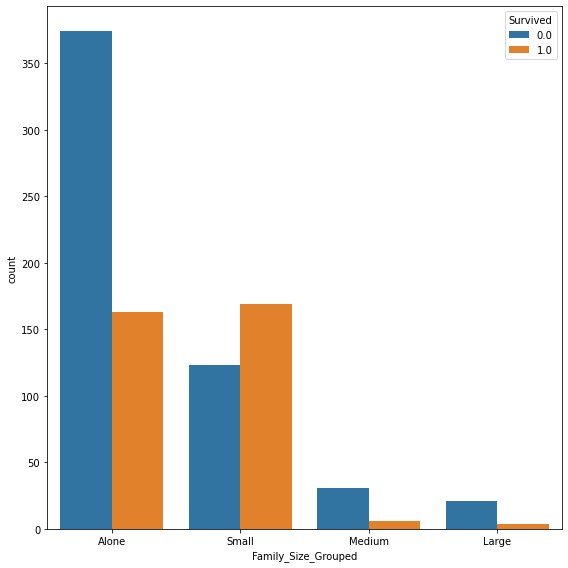

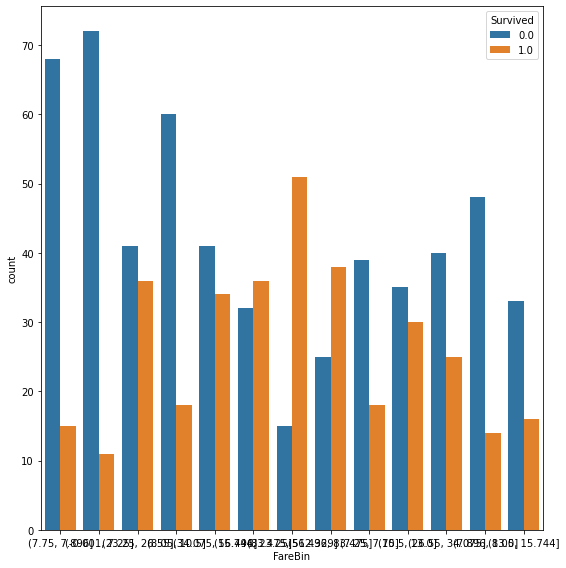

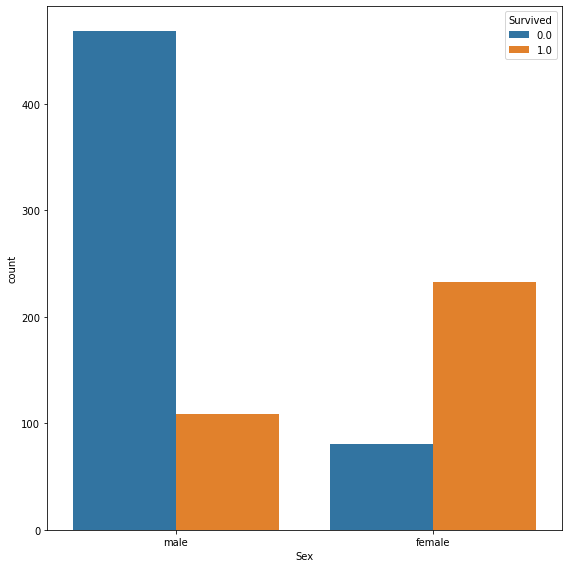

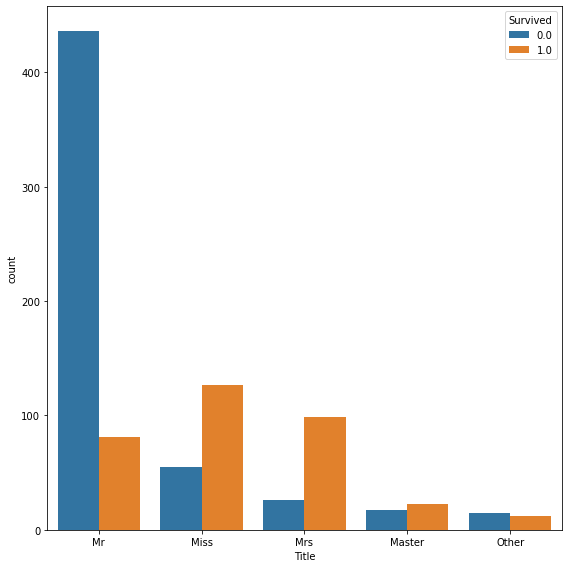

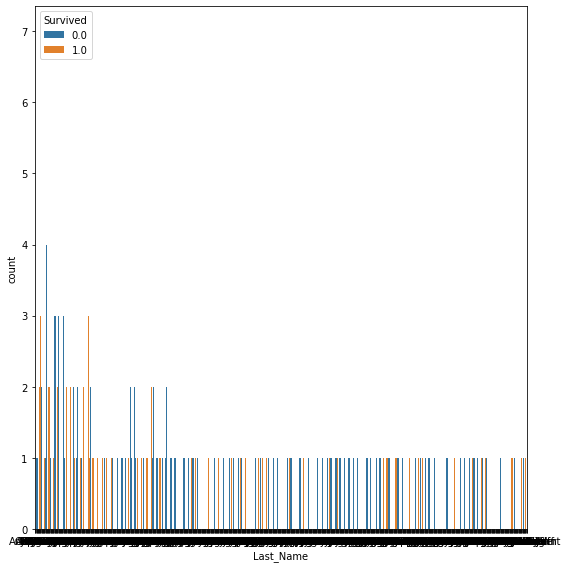

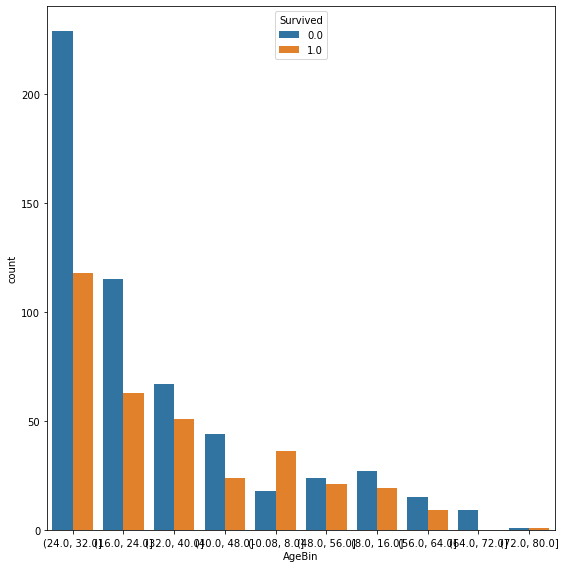

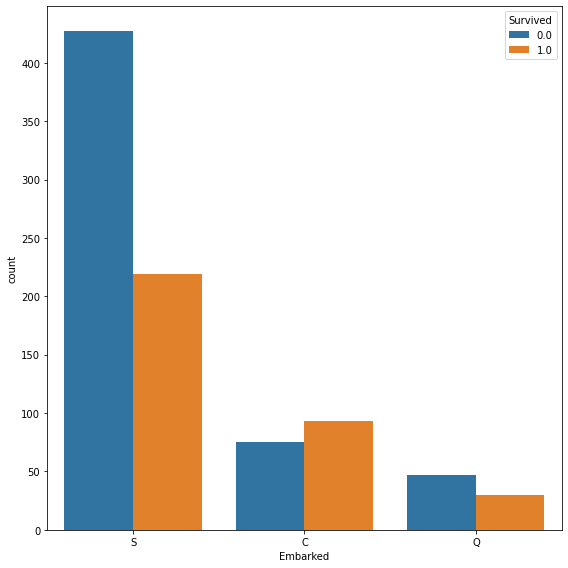

In [371]:
count_plot(df, cat_vars)

## Numerical Variable Analysis

In [372]:
def hist_plot(df, variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f"{variable} distribution with hist")
    plt.show()

In [373]:
df['Woman_or_Boy']

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Woman_or_Boy, Length: 1309, dtype: int32

Survived


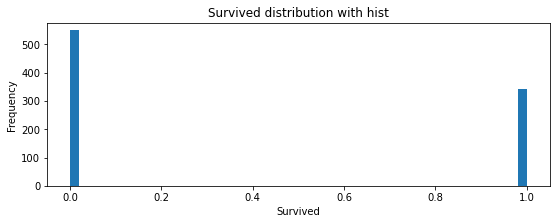

Pclass


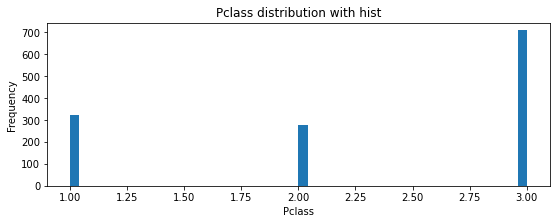

Age


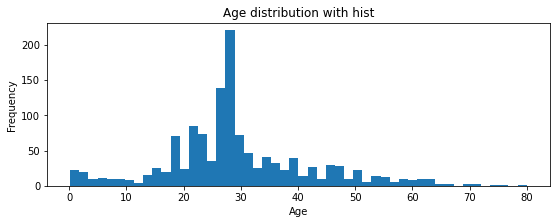

SibSp


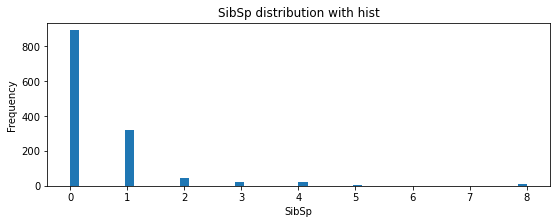

Parch


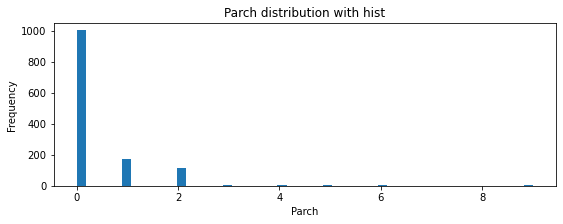

Ticket


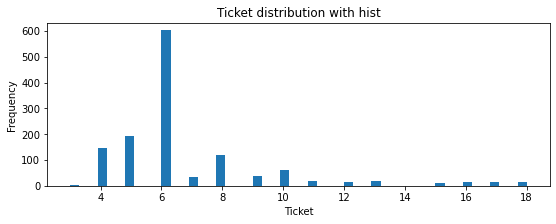

Fare


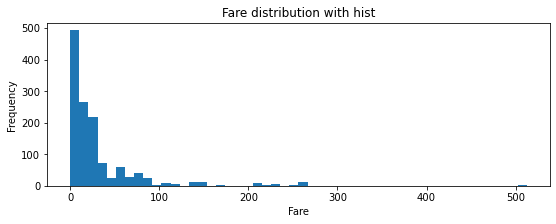

FamilySize


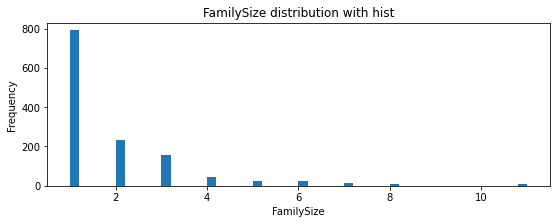

IsMarried


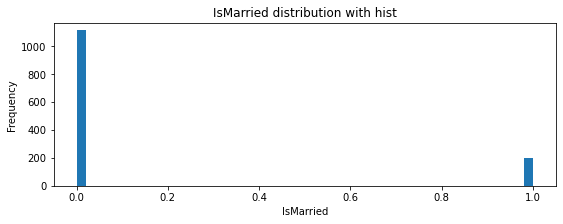

IsAlone


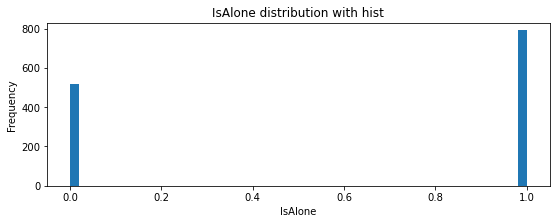

Woman_or_Boy


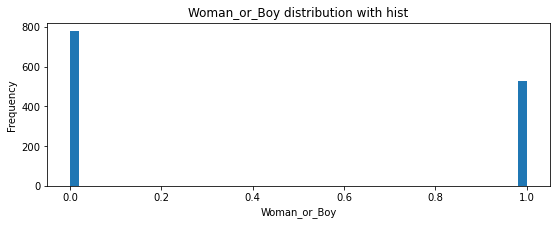

In [374]:
for num in num_vars:
    print(num)
    hist_plot(df, num)

### Check data

In [375]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Family_Size_Grouped,Title,Last_Name,IsMarried,IsAlone,Woman_or_Boy,FareBin,AgeBin
0,0.0,3,male,22.0,1,0,9,7.2500,S,2,Small,Mr,Braund,0,0,0,"(-0.001, 7.25]","(16.0, 24.0]"
1,1.0,1,female,38.0,1,0,8,71.2833,C,2,Small,Mrs,Cumings,1,0,1,"(56.496, 83.475]","(32.0, 40.0]"
2,1.0,3,female,26.0,0,0,16,7.9250,S,1,Alone,Miss,Heikkinen,0,1,1,"(7.896, 8.05]","(24.0, 32.0]"
3,1.0,1,female,35.0,1,0,6,53.1000,S,2,Small,Mrs,Futrelle,1,0,1,"(34.075, 56.496]","(32.0, 40.0]"
4,0.0,3,male,35.0,0,0,6,8.0500,S,1,Alone,Mr,Allen,0,1,0,"(7.896, 8.05]","(32.0, 40.0]"


In [376]:
print(num_vars)
print(cat_vars)

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'IsMarried', 'IsAlone', 'Woman_or_Boy']
['Family_Size_Grouped', 'FareBin', 'Sex', 'Title', 'Last_Name', 'AgeBin', 'Embarked']


## Encoder

In [377]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Family_Size_Grouped,Title,Last_Name,IsMarried,IsAlone,Woman_or_Boy,FareBin,AgeBin
0,0.0,3,male,22.0,1,0,9,7.2500,S,2,Small,Mr,Braund,0,0,0,"(-0.001, 7.25]","(16.0, 24.0]"
1,1.0,1,female,38.0,1,0,8,71.2833,C,2,Small,Mrs,Cumings,1,0,1,"(56.496, 83.475]","(32.0, 40.0]"
2,1.0,3,female,26.0,0,0,16,7.9250,S,1,Alone,Miss,Heikkinen,0,1,1,"(7.896, 8.05]","(24.0, 32.0]"
3,1.0,1,female,35.0,1,0,6,53.1000,S,2,Small,Mrs,Futrelle,1,0,1,"(34.075, 56.496]","(32.0, 40.0]"
4,0.0,3,male,35.0,0,0,6,8.0500,S,1,Alone,Mr,Allen,0,1,0,"(7.896, 8.05]","(32.0, 40.0]"


In [378]:
df=pd.get_dummies(df, drop_first=True)

In [379]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsMarried,IsAlone,...,"FareBin_(83.475, 512.329]","AgeBin_(8.0, 16.0]","AgeBin_(16.0, 24.0]","AgeBin_(24.0, 32.0]","AgeBin_(32.0, 40.0]","AgeBin_(40.0, 48.0]","AgeBin_(48.0, 56.0]","AgeBin_(56.0, 64.0]","AgeBin_(64.0, 72.0]","AgeBin_(72.0, 80.0]"
0,0.0,3,22.0,1,0,9,7.2500,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,8,71.2833,2,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,16,7.9250,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1,35.0,1,0,6,53.1000,2,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,6,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 916 entries, Survived to AgeBin_(72.0, 80.0]
dtypes: float64(3), int32(1), int64(7), uint8(905)
memory usage: 1.3 MB


In [381]:
df.isnull().sum()

Survived               418
Pclass                   0
Age                      0
SibSp                    0
Parch                    0
                      ... 
AgeBin_(40.0, 48.0]      0
AgeBin_(48.0, 56.0]      0
AgeBin_(56.0, 64.0]      0
AgeBin_(64.0, 72.0]      0
AgeBin_(72.0, 80.0]      0
Length: 916, dtype: int64

## Split Training and Testing Data

In [382]:
train_df=df[df['Survived'].notnull()]
test_df=df[df['Survived'].isnull()]

In [383]:
print(train_df.shape)
print(test_df.shape)

(891, 916)
(418, 916)


In [384]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsMarried,IsAlone,...,"FareBin_(83.475, 512.329]","AgeBin_(8.0, 16.0]","AgeBin_(16.0, 24.0]","AgeBin_(24.0, 32.0]","AgeBin_(32.0, 40.0]","AgeBin_(40.0, 48.0]","AgeBin_(48.0, 56.0]","AgeBin_(56.0, 64.0]","AgeBin_(64.0, 72.0]","AgeBin_(72.0, 80.0]"
0,0.0,3,22.0,1,0,9,7.2500,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,8,71.2833,2,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,16,7.9250,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1.0,1,35.0,1,0,6,53.1000,2,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,6,8.0500,1,0,1,...,0,0,0,0,1,0,0,0,0,0


In [385]:
test_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsMarried,IsAlone,...,"FareBin_(83.475, 512.329]","AgeBin_(8.0, 16.0]","AgeBin_(16.0, 24.0]","AgeBin_(24.0, 32.0]","AgeBin_(32.0, 40.0]","AgeBin_(40.0, 48.0]","AgeBin_(48.0, 56.0]","AgeBin_(56.0, 64.0]","AgeBin_(64.0, 72.0]","AgeBin_(72.0, 80.0]"
0,NaN,3,34.5,0,0,6,7.8292,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,NaN,3,47.0,1,0,6,7.0000,2,1,0,...,0,0,0,0,0,1,0,0,0,0
2,NaN,2,62.0,0,0,6,9.6875,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,NaN,3,27.0,0,0,6,8.6625,1,0,1,...,0,0,0,1,0,0,0,0,0,0
4,NaN,3,22.0,1,1,7,12.2875,3,1,0,...,0,0,1,0,0,0,0,0,0,0


In [386]:
X=train_df.drop('Survived', axis=1)
Y=train_df['Survived'].astype('int')

In [387]:
test_df.drop('Survived', axis=1, inplace=True)
test_df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsMarried,IsAlone,Woman_or_Boy,...,"FareBin_(83.475, 512.329]","AgeBin_(8.0, 16.0]","AgeBin_(16.0, 24.0]","AgeBin_(24.0, 32.0]","AgeBin_(32.0, 40.0]","AgeBin_(40.0, 48.0]","AgeBin_(48.0, 56.0]","AgeBin_(56.0, 64.0]","AgeBin_(64.0, 72.0]","AgeBin_(72.0, 80.0]"
0,3,34.5,0,0,6,7.8292,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,3,47.0,1,0,6,7.0000,2,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2,62.0,0,0,6,9.6875,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,27.0,0,0,6,8.6625,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3,22.0,1,1,7,12.2875,3,1,0,1,...,0,0,1,0,0,0,0,0,0,0


## Scaler

In [388]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
test_df=sc.fit_transform(test_df)

# Model

In [389]:
def train_show_results(X, Y, test_df, model, split_share = 0.3,  **kwargs):
    
    print(f"Training using {model} with {kwargs}")
    m = model(**kwargs)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = split_share, stratify = Y)
    
    m.fit(X_train, Y_train)
    report(m, X_test, Y_test, test_df)

In [390]:
def report(model, X_test, Y_test, test_df):
    preds = model.predict(X_test)
    print(metrics.classification_report(Y_test, preds))
    
    ax = metrics.plot_roc_curve(model, X_test, Y_test)
    plt.title(f"ROC-AUC curve using {str(model).split('.')[-1]}")
    print("Accuracy: %s%%" % (100*accuracy_score(Y_test, preds)))
    plt.show()
    return model.predict(test_df)

In [391]:
def submission(preds):
    result=pd.DataFrame()
    result['PassengerId']=test_PassengerId
    result['Survived']=preds
    result.head()
    result.to_csv('submission.csv', index=False) 

Training using <class 'sklearn.linear_model._logistic.LogisticRegression'> with {'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       165
           1       0.83      0.75      0.79       103

    accuracy                           0.84       268
   macro avg       0.84      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

Accuracy: 84.32835820895522%


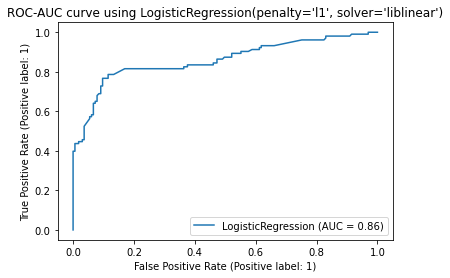

In [392]:
train_show_results(X, Y, test_df, LogisticRegression, penalty="l1", solver="liblinear")

Training using <class 'sklearn.ensemble._forest.RandomForestClassifier'> with {'max_depth': 100}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       165
           1       0.82      0.70      0.75       103

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

Accuracy: 82.46268656716418%


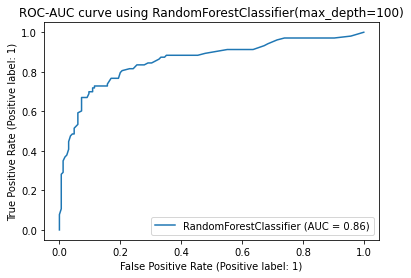

In [393]:
train_show_results(X, Y, test_df, RandomForestClassifier, max_depth=100)

Training using <class 'sklearn.svm._classes.SVC'> with {'C': 50}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       165
           1       0.89      0.70      0.78       103

    accuracy                           0.85       268
   macro avg       0.86      0.82      0.83       268
weighted avg       0.86      0.85      0.85       268

Accuracy: 85.07462686567165%


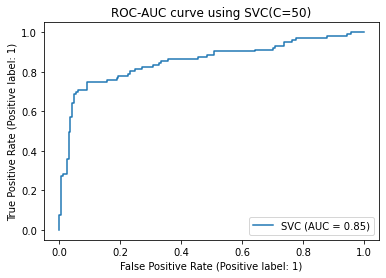

In [394]:
train_show_results(X, Y, test_df, SVC, C=50)

# Model Tuning

Fitting 5 folds for each of 96 candidates, totalling 480 fits
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       549
           1       0.91      0.75      0.82       342

    accuracy                           0.88       891
   macro avg       0.89      0.85      0.86       891
weighted avg       0.88      0.88      0.87       891

Accuracy: 87.54208754208754%


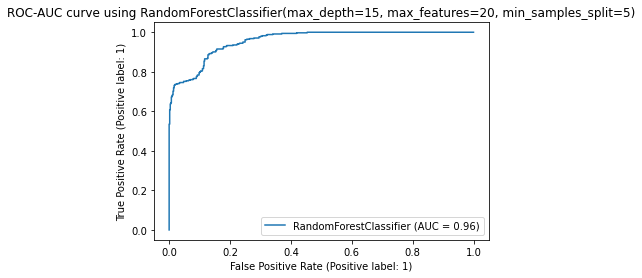

In [395]:
random_state=1

rf_param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_param_grid, 
                       cv = StratifiedKFold(n_splits = 5), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X, Y)
final_model=clf.best_estimator_
final_model.fit(X, Y)
pred_rf=report(final_model, X, Y, test_df)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

Accuracy: 98.4287317620651%


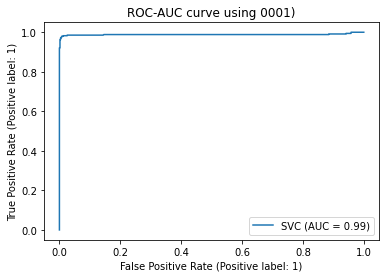

In [396]:
random_state=1
svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.0001,0.001,0.1,1,10,50,100],
                 "C": [0.0001,0.001,0.1,1,10,50,100],
                 }

clf = GridSearchCV(SVC(), param_grid=svc_param_grid, 
                       cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X, Y)
final_model=clf.best_estimator_
final_model.fit(X, Y)
preds_svc=report(final_model, X, Y, test_df)

In [397]:
submission(preds_svc)